In [ ]:
#@title Librerias
import numpy as np
import sympy as sp
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from numpy.linalg import solve

## Actividad
Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, encontrando los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

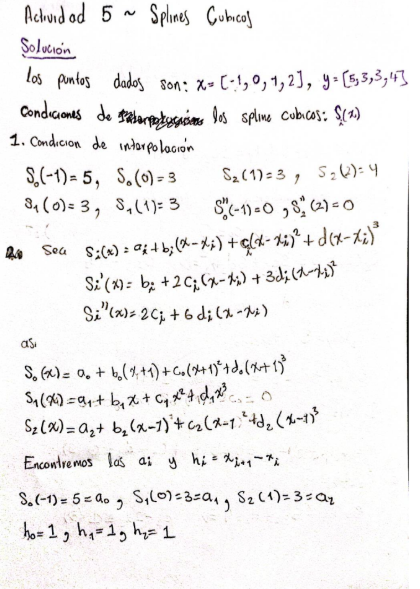

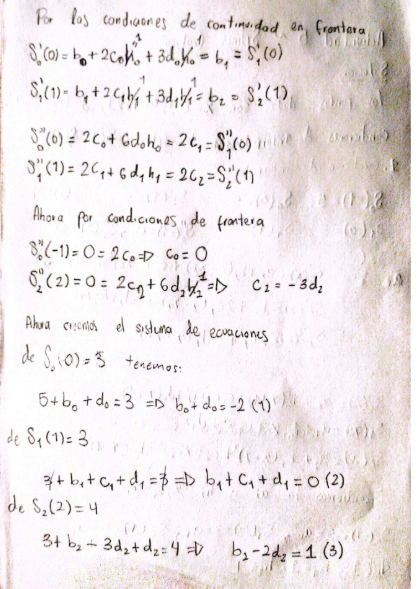

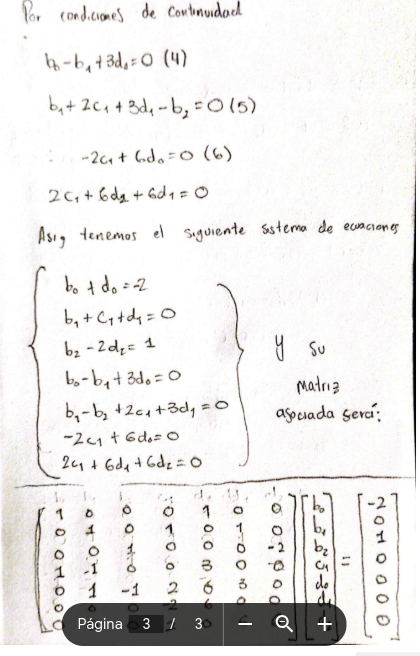

In [ ]:
xdat = [-1,0,1,2]
ydat = [5,3,3,4]
x0 = xdat[0]
x1 = xdat[1]
x2 = xdat[2]
x3 = xdat[3]


cub = CubicSpline(xdat,ydat)


A = np.array([[1,0,0,0,1,0,0],
              [0,1,0,1,0,1,0],
              [0,0,1,0,0,0,-2],
              [1,-1,0,0,3,0,0],
              [0,1,-1,2,0,3,0],
              [0,0,0,-2,6,0,0],
              [0,0,0,2,0,6,6]])

b = np.array([-2,0,1,0,0,0,0])


b0, b1, b2, c1, d0, d1, d2 = solve(A,b)

a0, a1, a2 = 5, 3, 3

c2 = -3*d2
c0 = 0

x = sp.symbols('x')
pol0 = a0 + b0*(x-x0) + c0*(x-x0)**2 + d0*(x-x0)**3
pol1 = a1 + b1*(x-x1) + c1*(x-x1)**2 + d1*(x-x1)**3
pol2 = a2 + b2*(x-x2) + c2*(x-x2)**2 + d2*(x-x2)**3

p0 = sp.lambdify(x, pol0)
p1 = sp.lambdify(x, pol1)
p2 = sp.lambdify(x, pol2)

print("Los polinomios resultantes son")
print(f"S_0 = {sp.expand(pol0)}")
print(f"S_1 = {sp.expand(pol1)}")
print(f"S_0 = {sp.expand(pol2)}")


Los polinomios resultantes son
S_0 = 0.466666666666667*x**3 + 1.4*x**2 - 1.06666666666667*x + 3.0
S_1 = -0.333333333333333*x**3 + 1.4*x**2 - 1.06666666666667*x + 3
S_0 = -0.133333333333333*x**3 + 0.8*x**2 - 0.466666666666667*x + 2.8


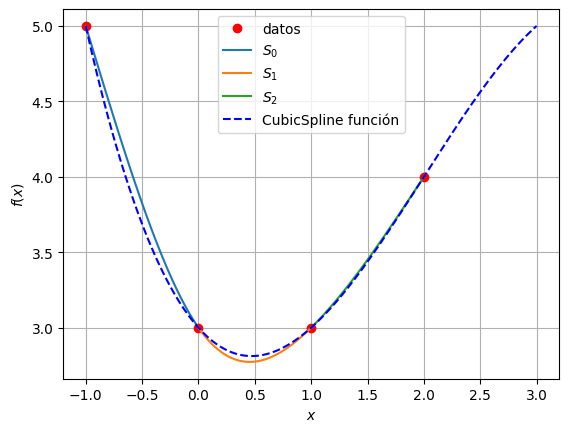

In [ ]:
# Grafica

x_0 = np.linspace(x0,x1,300)
x_1 = np.linspace(x1,x2,300)
x_2 = np.linspace(x2,x3,300)

x_cub = np.linspace(-1, x3 +1, 300)

plt.plot(xdat,ydat,'ro', label = 'datos')
plt.plot(x_0,p0(x_0),label = '$S_0$')
plt.plot(x_1,p1(x_1),label = '$S_1$')
plt.plot(x_2,p2(x_2),label = '$S_2$')
plt.plot(x_cub, cub(x_cub),'--',color = 'b', label = 'CubicSpline función')
plt.legend()
plt.xlabel('$x$')

plt.ylabel('$f(x)$')
plt.grid()
plt.show()

<ipython-input-11-87df087b3b5f>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


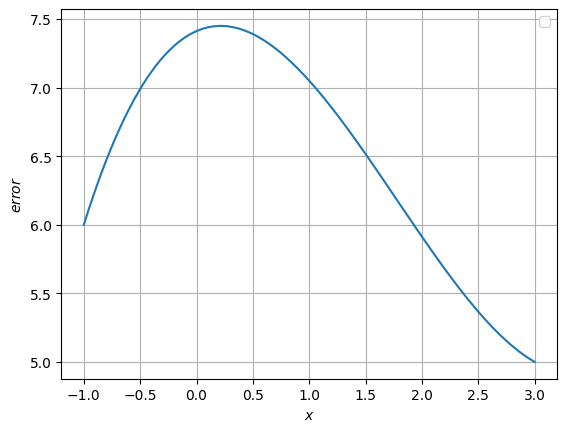

In [ ]:
#grafica el error
suma = p0(x_0) + p1(x_1) + p2(x_2)
plt.plot(x_cub, abs(cub(x_cub) - suma))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$error$')
plt.grid()
plt.show()

Evaluando la respuestapara x = 1.5

In [ ]:
ya = p2(1.5)

yr = cub(1.5)
print(f'''La interpolación en 1.5 de el polinomio encontrado es de {ya}
mientras que el resultado por medio de la funcion CubicSplines es de {yr}
se tiene un error de {round((abs(ya -yr)/abs(yr))*100,3)} %
      ''')

La interpolación en 1.5 de el polinomio encontrado es de 3.226744186046516
mientras que el resultado por medio de la funcion CubicSplines es de 3.4375
se tiene un error de 6.131 %
      
